In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('../data/initital/internship_train.csv')

In [37]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,target
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,...,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,249.423944,250.236267,248.637289,249.736600,249.436178,249.656167,-0.011402,0.498548,0.499189,249.842033,...,7.475155,7.523962,7.508397,7.473322,7.490658,7.474578,7.509206,7.487159,7.513316,50.033981
std,144.336393,144.022200,144.107577,144.284945,143.941581,144.329168,7.038171,0.288682,0.500002,144.612718,...,4.330410,4.321537,4.331761,4.335692,4.332122,4.323035,4.326364,4.324876,4.333080,28.897243
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.949874,0.000014,0.000000,0.000000,...,0.000019,0.000040,0.000154,0.000083,0.000367,0.000014,0.000160,0.000147,0.000125,0.002634
25%,125.000000,126.000000,124.000000,125.000000,125.000000,124.000000,-7.071068,0.248932,0.000000,124.000000,...,3.707544,3.797002,3.760627,3.715721,3.739358,3.715298,3.773381,3.743536,3.776322,25.091903
50%,250.000000,251.000000,248.000000,250.000000,250.000000,250.000000,0.000000,0.497136,0.000000,250.000000,...,7.474127,7.533987,7.505259,7.459774,7.494167,7.477270,7.512575,7.476564,7.506812,50.030705
75%,374.000000,375.000000,374.000000,375.000000,373.000000,374.000000,7.000000,0.747513,1.000000,376.000000,...,11.216585,11.276349,11.261971,11.215637,11.239232,11.210070,11.268156,11.234414,11.277835,75.059454
max,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,9.949874,0.999987,1.000000,499.000000,...,14.999900,14.999528,14.999733,14.999478,14.999869,14.999928,14.999948,14.999364,14.999775,99.999482


Here we can see that a lot of feature have almost equal std and mean etc. what can be a purpose to use clustering.

In [27]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing

[]

In [ ]:
categorical_features = (df.dtypes == 'object')
object_cols = list(categorical_features[categorical_features].index)
object_cols

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

We see that there are no categorical features and missing values in our dataset

<AxesSubplot:>

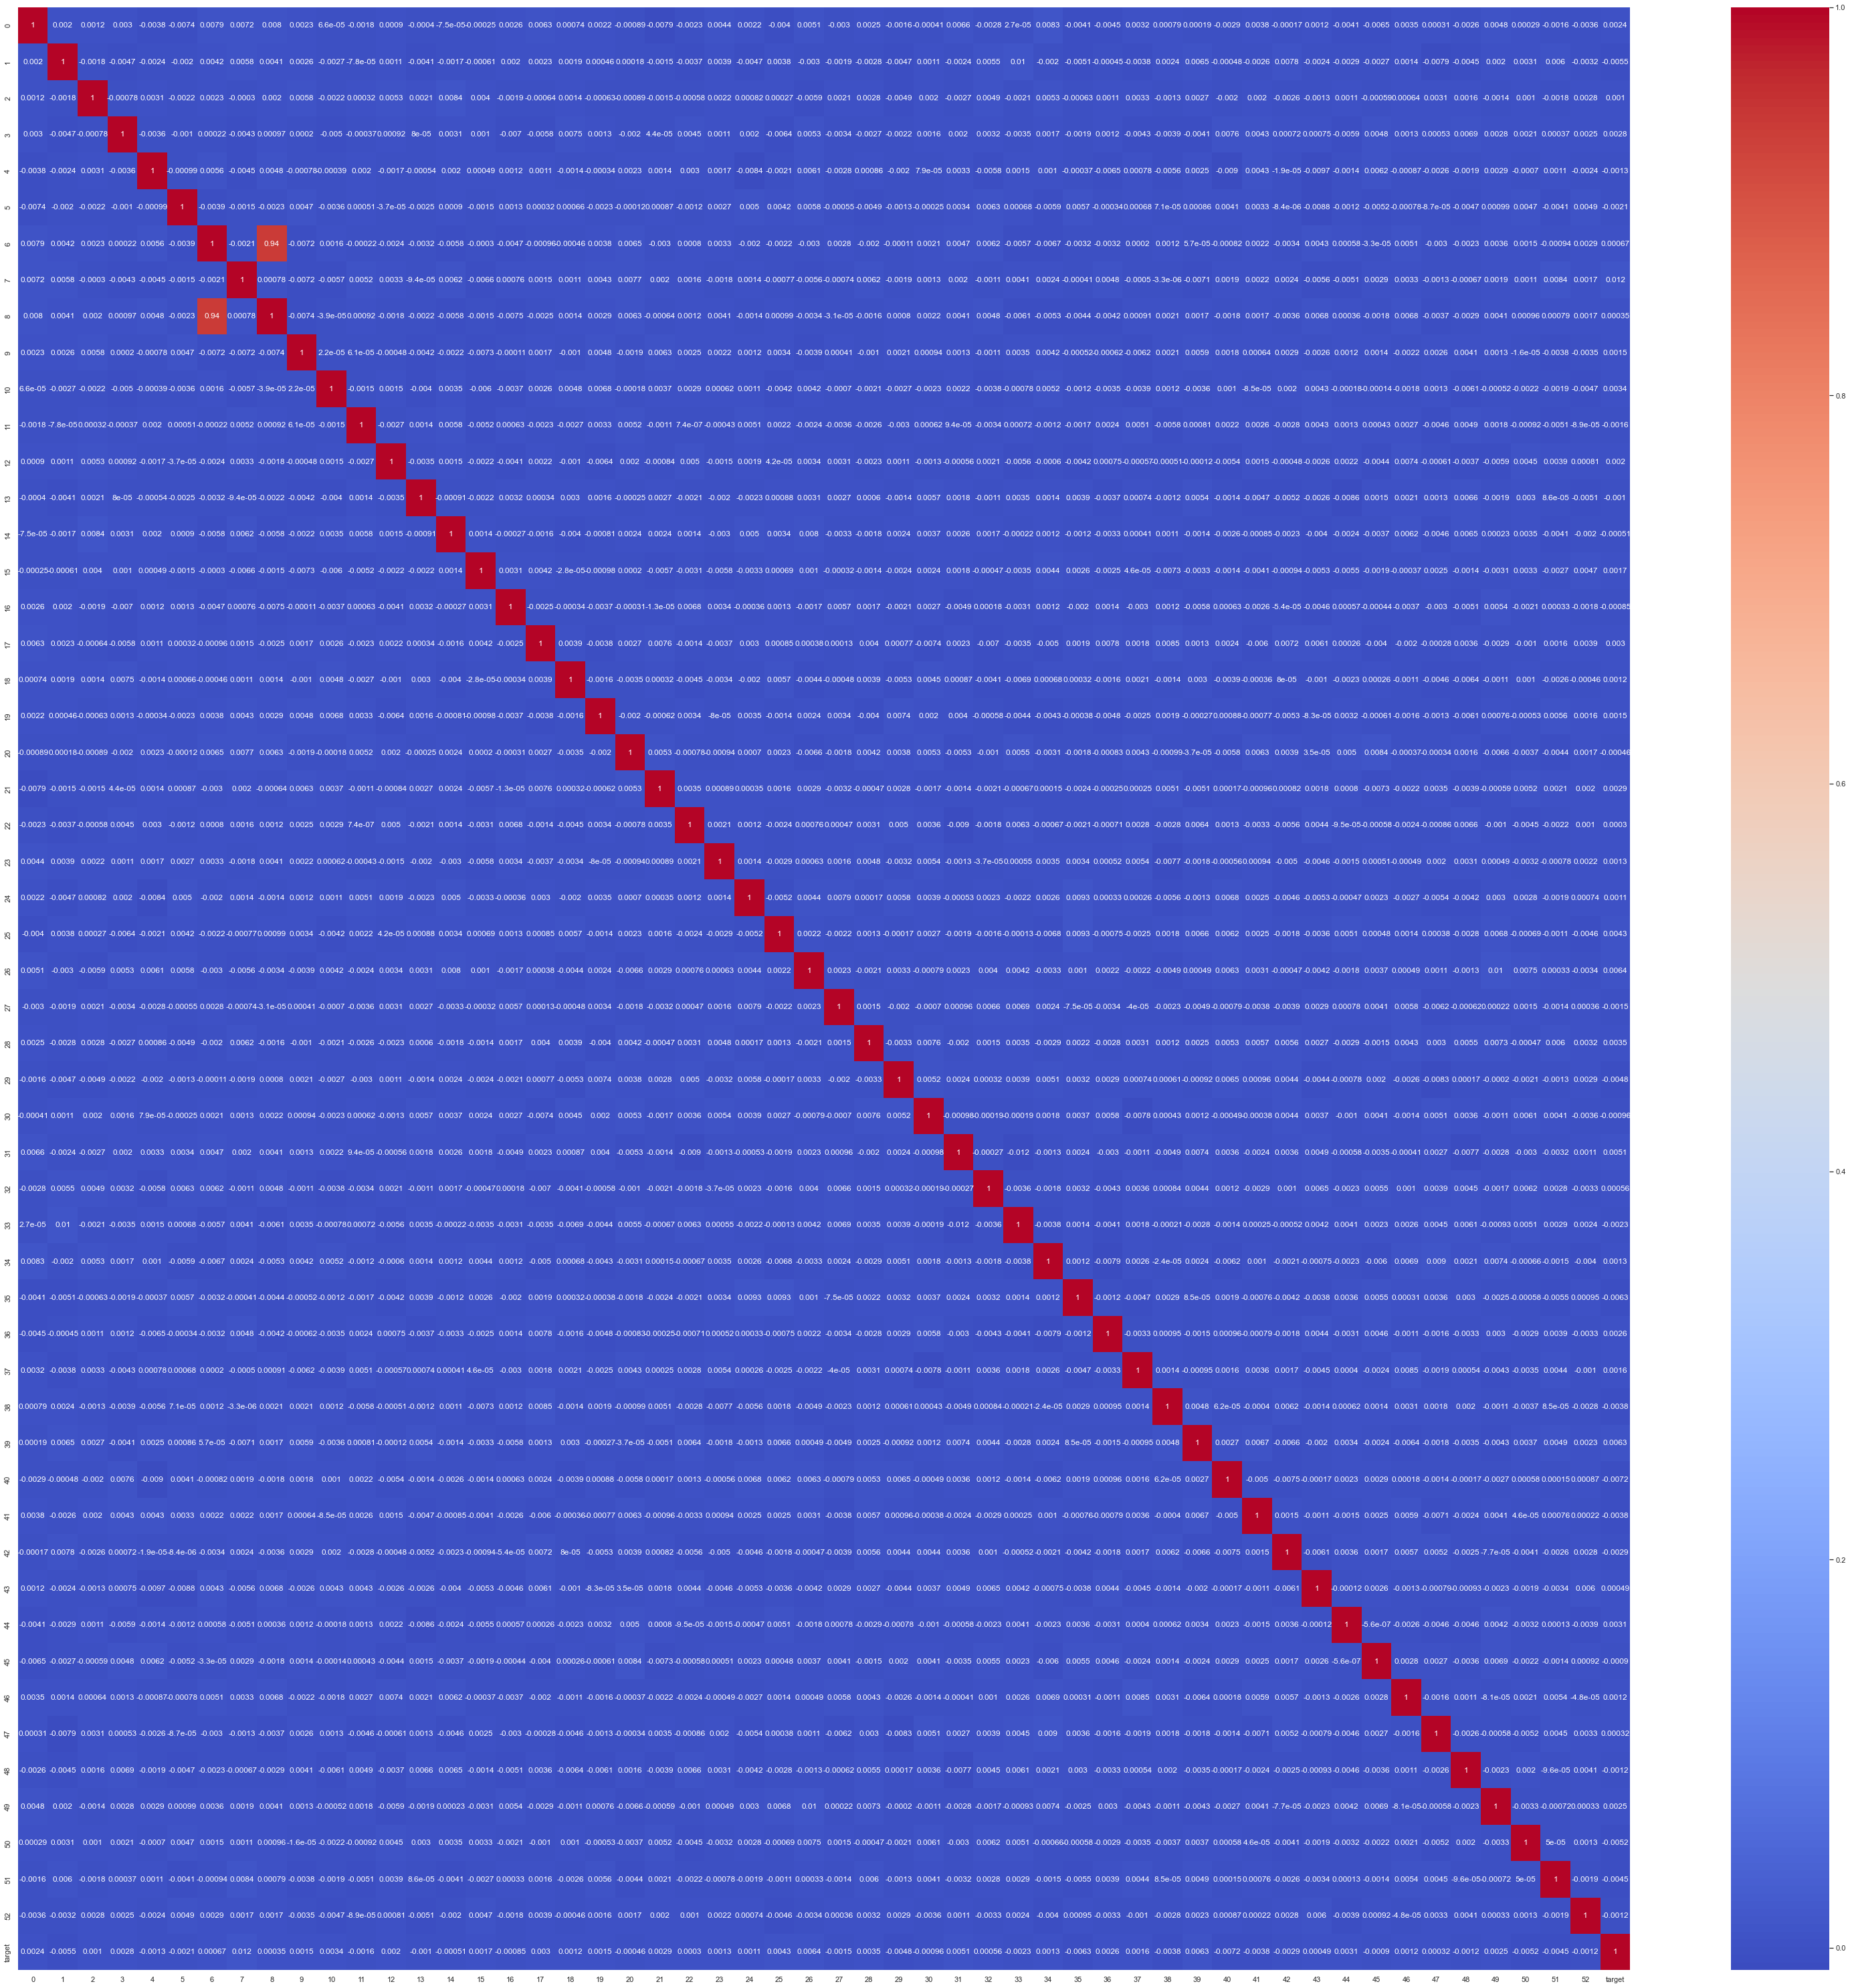

In [6]:
sns.set(rc = {'figure.figsize':(54,54)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


We see that there are low corelation between features and target so there are probably non linear relationships.

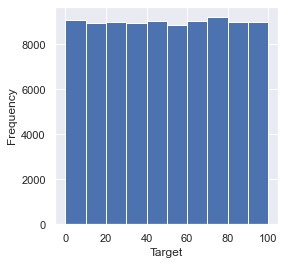

In [8]:
plt.rcParams['figure.figsize'] = [4, 4]

plt.hist(df["target"])
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()

Here we see that our target is evenly distributed.

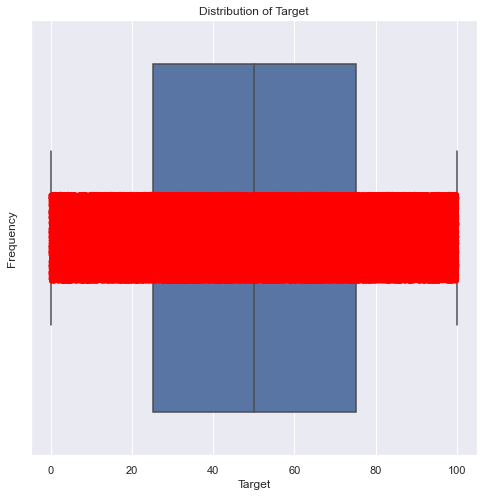

In [9]:


# Create a boxplot to visualize the distribution of the data
sns.set(rc={'figure.figsize':(8,8)})

sns.boxplot(x=df["target"])

# Add a scatterplot to identify the outliers
sns.stripplot(x=df["target"], color="red")

# Set the title and labels for the plot
plt.title("Distribution of Target")
plt.xlabel("Target")
plt.ylabel("Frequency")

# Show the plot
plt.show()


Here we can see that there are no outliers in our data.

In [13]:
x_prekol = df.copy()
y_prekol = x_prekol.pop("target")

# Label encoding for categoricals
for colname in x_prekol.select_dtypes("object"):
    x_prekol[colname], _ = x_prekol[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = x_prekol.dtypes == int

In [14]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x_prekol, y_prekol, discrete_features)
mi_scores  # show a few features with their MI scores


6     4.602137
7     1.274221
29    0.005362
22    0.004537
23    0.004287
28    0.003347
33    0.003322
2     0.002755
47    0.001964
48    0.001669
16    0.001606
12    0.001536
45    0.001301
10    0.000963
40    0.000956
3     0.000909
9     0.000904
18    0.000901
26    0.000665
41    0.000542
32    0.000407
35    0.000387
37    0.000257
14    0.000177
30    0.000146
1     0.000106
50    0.000000
51    0.000000
38    0.000000
44    0.000000
49    0.000000
43    0.000000
46    0.000000
36    0.000000
42    0.000000
39    0.000000
0     0.000000
34    0.000000
31    0.000000
27    0.000000
25    0.000000
24    0.000000
21    0.000000
20    0.000000
19    0.000000
17    0.000000
15    0.000000
13    0.000000
11    0.000000
8     0.000000
5     0.000000
4     0.000000
52    0.000000
Name: MI Scores, dtype: float64

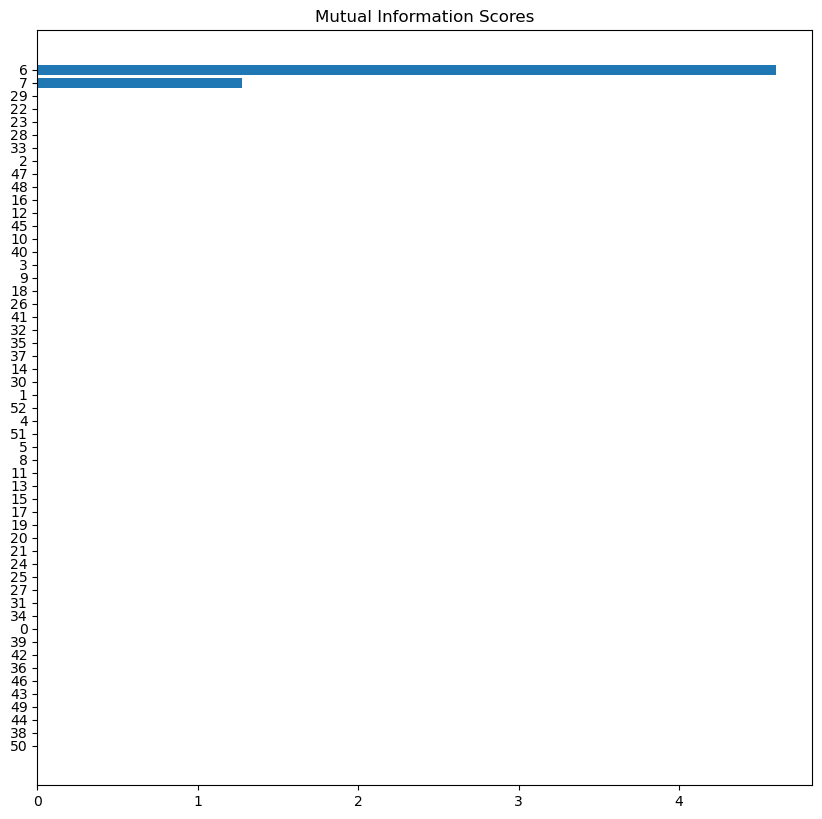

In [24]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 10))
plot_mi_scores(mi_scores)


Here we see that  we can use only 6th and 7th features.

Let's visualize realationship between our features and targer.

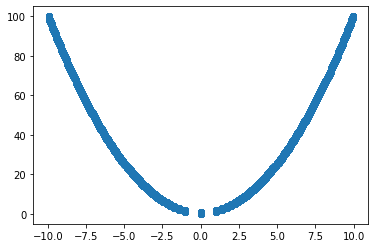

In [22]:
new_df = df[['6', '7']].copy()
X = new_df
Y = df['target']

plt.scatter(X['6'], Y)
plt.show()

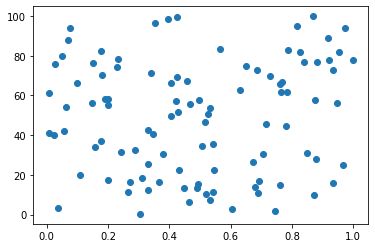

In [33]:
plt.scatter(X['7'][:100], Y[:100])
plt.show()

Now we can say that there is no pattern in relationships between 7th feature and target, so we probably should use only 6th feature in our model.